In [9]:
#Missing Value Check
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/sample_data/EPL_20_21.csv')
print('\033[1m' + 'Running a missing value check: ' + '\033[0m')
print()
df.info()

Running a missing value check: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     53

From running df.info(), it can be seen that there is no missing values in the data set.

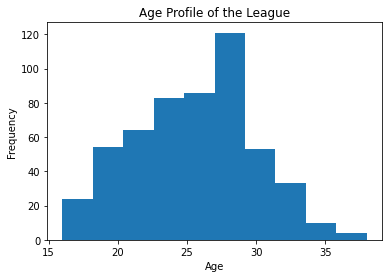

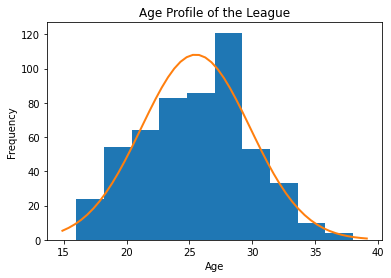


Age Summary Descriptive Statistics: 


count    532.000000
mean      25.500000
std        4.319404
min       16.000000
25%       22.000000
50%       26.000000
75%       29.000000
max       38.000000
Name: Age, dtype: float64

In [13]:
#Age Profile of the League

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import statistics

df = pd.read_csv('/content/sample_data/EPL_20_21.csv')

#Plotting Histogram

age = df['Age']

plt.hist(age, bins =10)
plt.title('Age Profile of the League')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.clf()

#Plotting Normal Distribution Curve

#Scaling of Normal Distribution Curve's Axis
result = plt.hist(age, bins = 10)
dx = result[1][1] - result[1][0]
scale = len(age) * dx

# Calculating mean and standard deviation

mu, std = norm.fit(age)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50 )

p = norm.pdf(x, mu, std) * scale
plt.title('Age Profile of the League')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.plot(x, p, linewidth=2)
plt.show()

#Summary Descriptive Statistics
print()
print('\033[1m' + 'Age Summary Descriptive Statistics: ' +'\033[0m')
age.describe()

No. of Nationalities Grouped By Their Clubs: 

Club                     Nationality
Wolverhampton Wanderers  USA            1
                         POR            9
                         NED            1
                         MEX            1
                         MAR            1
                                       ..
Arsenal                  EGY            1
                         CIV            1
                         BRA            4
                         BIH            1
                         AUS            1
Length: 265, dtype: int64

The English Premier League: 

There are 192 English players in the English Premier League.

There are 340 non-English players in the English Premier League.



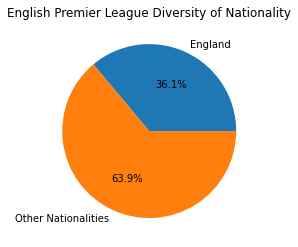


Manchester City: 

There are 6 English players in Manchester City.

There are 18 non-English players in Manchester City



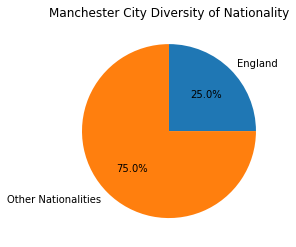


Manchester United: 

There are 10 English players in Manchester United

There are 19 non-English players in Manchester United



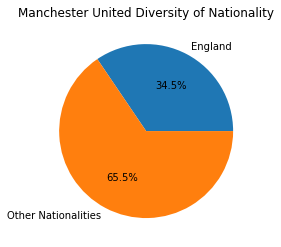


Liverpool FC:

The are 8 English players in Liverpool FC

There are 20 non-English players in Liverpool FC



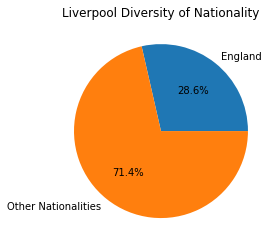


Chelsea

There are 8 English players in Chelsea

There are 19 non-English players in Chelsea



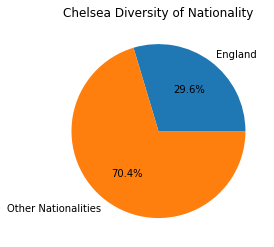

<Figure size 432x288 with 0 Axes>

In [4]:
#Diversity of Nationality
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/EPL_20_21.csv')
nation = df.groupby(['Club','Nationality'])
nations = nation.size()
nationsd = nations.sort_index(ascending = False, level = 'Club')
print('\033[1m'+ 'No. of Nationalities Grouped By Their Clubs: ' + '\033[0m')
print()
print(nationsd)
print()

#Calculating No. of English (ENG) players in the league
league = df.groupby(['Nationality'])
league = league.size()
engplayers = league.loc['ENG']
print('\033[1m' + 'The English Premier League: ' + '\033[0m')
print()
print(f'There are {engplayers} English players in the English Premier League.')
print()

#Calculating No. of Non-English players in the league by dropping ENG players from the extracted dataFrame
league = league.drop('ENG', axis=0)
on = league.sum()
print(f'There are {on} non-English players in the English Premier League.')
print()

#Plotting of Piechart for the whole English Premier League itself
labels = ['England','Other Nationalities']
values = [engplayers, on]
plt.title('English Premier League Diversity of Nationality')
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.show()
plt.clf()
print()

#Calculating No. of English (ENG) players in Manchester City
mc = nationsd.loc['Manchester City']
engplayers = mc.loc['ENG']
print('\033[1m' + 'Manchester City: ' + '\033[0m')
print()
print(f'There are {engplayers} English players in Manchester City.')
print()

#Calculating No. of Non-English players in Manchester City by dropping ENG players from the extracted dataFrame
mc = nationsd.loc['Manchester City']
mc = mc.drop('ENG', axis = 0)
on = mc.sum()
print(f'There are {on} non-English players in Manchester City')
print()

#Plotting of Piechart for Manchester City
labels = ['England','Other Nationalities']
values = [engplayers, on]
plt.title('Manchester City Diversity of Nationality')
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.show()
plt.clf()
print()

#Calculating No. of English (ENG) players in Manchester United
mu = nationsd.loc['Manchester United']
engplayers = mu.loc['ENG']
print('\033[1m' + 'Manchester United: ' + '\033[0m')
print()
print(f'There are {engplayers} English players in Manchester United')
print()

#Calculating No. of Non-English players in Manchester United by dropping ENG players from the extracted dataFrame
mu = nationsd.loc['Manchester United']
mu = mu.drop('ENG', axis = 0)
on = mu.sum()
print(f'There are {on} non-English players in Manchester United')
print()

#Plotting of Piechart for Manchester United
labels = ['England','Other Nationalities']
valuesmu = [engplayers,on]
plt.title('Manchester United Diversity of Nationality')
plt.pie(valuesmu, labels = labels, autopct='%1.1f%%')
plt.show()
plt.clf()
print()

#Calculating No. of ENG players in Liverpool FC
l = nationsd.loc['Liverpool FC']
engplayers = l.loc['ENG']
print('\033[1m' + 'Liverpool FC:' + '\033[0m')
print()
print(f'The are {engplayers} English players in Liverpool FC')
print()

#Calculating No. of Non-English players in Liverpool FC by dropping ENG players from the extracted dataFrame
l = nationsd.loc['Liverpool FC']
l = l.drop('ENG', axis = 0)
on = l.sum()
print(f'There are {on} non-English players in Liverpool FC')
print()

#Plotting of Piechart for Liverpool FC
labels = ['England','Other Nationalities']
values = [engplayers,on]
plt.title('Liverpool Diversity of Nationality')
plt.pie(values, labels=labels,autopct='%1.1f%%')
plt.show()
plt.clf()
print()

#Calculating No. of English (ENG) players in Chelsea
c = nationsd.loc['Chelsea']
engplayers = c.loc['ENG']
print('\033[1m' + 'Chelsea' + '\033[0m')
print()
print(f'There are {engplayers} English players in Chelsea')
print()

#Calculating No. of Non-English players in Chelsea by dropping ENG players from the extracted dataFrame 
c = nationsd.loc['Chelsea']
c = c.drop('ENG', axis = 0)
on = c.sum()
print(f'There are {on} non-English players in Chelsea')
print()

#Plotting of Piechart for Chelsea
labels = ['England','Other Nationalities']
values = [engplayers, on]
plt.title('Chelsea Diversity of Nationality')
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.show()
plt.clf()

Total no of yellow cards that each club has received: 

                         Total Yellow Cards
Club                                       
Arsenal                                  59
Aston Villa                              79
Brighton                                 61
Burnley                                  48
Chelsea                                  57
Crystal Palace                           60
Everton                                  63
Fulham                                   73
Leeds United                             63
Leicester City                           61
Liverpool FC                             40
Manchester City                          50
Manchester United                        66
Newcastle United                         71
Sheffield United                         79
Southampton                              58
Tottenham Hotspur                        61
West Bromwich Albion                     59
West Ham United                          56
Wolverhampton Wander

Text(40, 80, 'r_squared = 0.174')

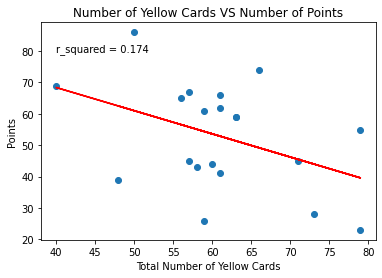

In [3]:
#Fouls (Yellow Cards) vs Points
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/sample_data/EPL_20_21.csv')

#Creating a new column from the combination of data in the two columns
Totalyc = df['Yellow_Cards']+ 2*df['Red_Cards']
df['Total Yellow Cards'] = Totalyc

clubtyc = df.groupby(['Club'])[['Total Yellow Cards']].sum()
print('\033[1m' + 'Total no of yellow cards that each club has received: ' + '\033[0m')
print()
print(clubtyc)
print()

#Loading second data set
df2 = pd.read_csv('/content/sample_data/EPL_20_21_Points.csv')
df2 = df2.set_index('Club')
print("\033[1m" + "The English Premier League's Points Table: " + "\033[0m")
print()
print(df2)
print()

#Merging the two datasets
df3 = pd.merge(clubtyc, df2, how='left', left_index=True, right_index=True)
print('\033[1m' + 'Merged Yellow Cards and Points Table: ' + '\033[0m')
print()
print(df3)
print()

#Plotting Scatter Plot
x = df3['Total Yellow Cards']
y = df3['Points']

plt.ylabel('Points')
plt.xlabel('Total Number of Yellow Cards')
plt.title('Number of Yellow Cards VS Number of Points')
plt.scatter(x,y)

import numpy as np
m,b = np.polyfit(x, y, deg=1)
plt.plot(x, m*x + b, 'r-')
print()

#Calculating R Square Value
correlation_matrix = np.corrcoef(x,y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(f'The r2 value is: {r_squared:.3f}')
print()

plt.annotate(f'r_squared = {r_squared:.3f}',(40,80))